In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import torch
import math
import h5py
import numpy
import matplotlib
import matplotlib.pyplot as plt
def imagesc(damp,alpha=1,cmin=1,cmax=1):
    damp = damp.detach().cpu().numpy()
    if cmin == cmax:
        cmin=numpy.min(damp)
        cmax=numpy.max(damp)
    fig = plt.figure(facecolor=[0, 32/255, 96/255],figsize=(10,5))
    plt.pcolormesh(damp, vmin=cmin, vmax=cmax,cmap= 'jet')
    ax = plt.gca() 
    ax.invert_yaxis() 
    plt.tick_params(axis='x',colors='w')
    plt.tick_params(axis='y',colors='w')
    ax.spines['right'].set_color('w')
    ax.spines['left'].set_color('w')
    ax.spines['bottom'].set_color('w')
    ax.spines['top'].set_color('w')
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
#     plt.xlabel("step",fontsize=20)
#     plt.ylabel("rate",fontsize=20)
    cb=plt.colorbar(pad=0.03)
    cb.ax.tick_params(colors='w',labelsize=18)
    cb.ax.spines['right'].set_color('w')
    matplotlib.cm.get_cmap('jet')
def norm_trace(seis):
    data_out = np.zeros(np.shape(seis))
    for k in range(np.size(seis,axis=1)):
        data_out[:,k] = seis[:,k]/np.max(np.abs(seis[:,k]))
    seis=data_out
    return seis
import scipy
def smooth2a(matrixIn,Nr,Nc):
    device = matrixIn.device
    matrixIn = matrixIn.cpu().numpy()
    [row,col] = matrixIn.shape
    eL = scipy.sparse.spdiags(numpy.ones((2*Nr,row)),numpy.arange(-Nr,Nr),row,row)
    eR = scipy.sparse.spdiags(numpy.ones((2*Nc,col)),numpy.arange(-Nc,Nc),col,col)
    nrmlize = eL@(numpy.ones_like(matrixIn))@eR
    matrixOut = eL@matrixIn@eR
    matrixOut = matrixOut/nrmlize
    matrixOut = torch.from_numpy(matrixOut)
    matrixOut = matrixOut.to(device)

In [3]:
##############################################

In [4]:
model_list=h5py.File('gassvpvs.mat')  
V_s_d = torch.from_numpy(model_list['vs_NN'][:].astype('float32')).T
V_p_d = torch.from_numpy(model_list['vp_NN'][:].astype('float32')).T
model_list=h5py.File('resP1.mat')  
resistivity_d = torch.from_numpy(model_list['res1'][:].astype('float32')).T
resistivity_d = resistivity_d[:,:235]
# resistivity_d = smooth2a(resistivity_d[:,:235],4,4)
V_s_d = V_s_d[:,:235]/1000
V_p_d = V_p_d[:,:235]/1000

In [5]:
# resix = torch.mean(resistivity_d,dim=1)
# from scipy import interpolate
# x = np.arange(0, 35)
# y = resix
# kinds = 'nearest'
# f = interpolate.interp1d(x, y, kind = kinds,fill_value='extrapolate')
# xnew = np.arange(0, 50, 1)
# resinew = f(xnew)
# plt.plot(resix)
# plt.plot(resinew)
# resinew = torch.from_numpy(resinew)

In [6]:
K_i = torch.tensor([42.6825,1.5,1.5])
G_i = torch.tensor([41.0340,1.4,1.4])
f_i1 = torch.tensor([0.9399,0.0493,0.0168])
f_i2 = torch.tensor([0.2521,0.5857,0.162])
f_i = (f_i1+f_i2)/2
# f_i = f_i1
rho_i = torch.tensor([2645,1840,1580])
phi_c = 0.4
n=(1.667)
f = 0.1
factor = 0.0140
rho_w = 1000*factor
rho_g = 0.92*factor
g = 9.81
K_wat = 2.2#*10+9
K_gas = 1.01e-4#*10+9
K_s = 1/2*(torch.sum(f_i*K_i)+(torch.sum(f_i/K_i))**(-1))
qwe = 2
K_s = 41.0340
G_s = 1/2*(torch.sum(f_i*G_i)+(torch.sum(f_i/G_i))**(-1))
G_s = 23.5915
rho_s = torch.sum(f_i*rho_i)
rho_s = 32.1476
a=0.5
m = 2
n = 2.2
r_w = 100
nu_s = 1/2*(3*K_s-2*G_s)/(3*K_s+G_s)
nu_s

0.2587674300497296

In [7]:
model_list=h5py.File('phitest.mat')  
V_p_d = torch.from_numpy(model_list['vp_d'][:].astype('float32')).T
V_s_d = torch.from_numpy(model_list['vs_d'][:].astype('float32')).T
V_s_d = V_s_d/1000
V_p_d = V_p_d/1000
phi_inv = 0.33*torch.ones_like(V_s_d)
S_w_inv  = 0.1*torch.ones_like(V_s_d)

<IPython.core.display.Javascript object>


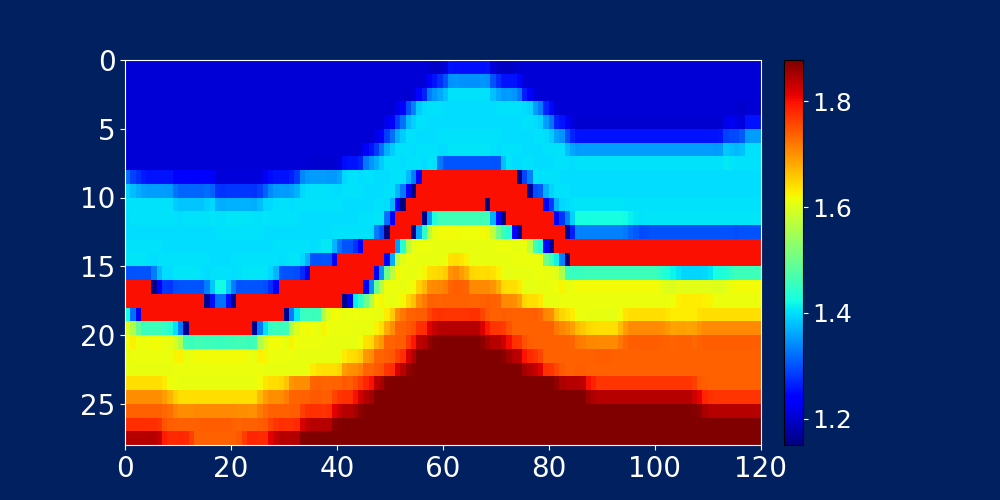

<IPython.core.display.Javascript object>


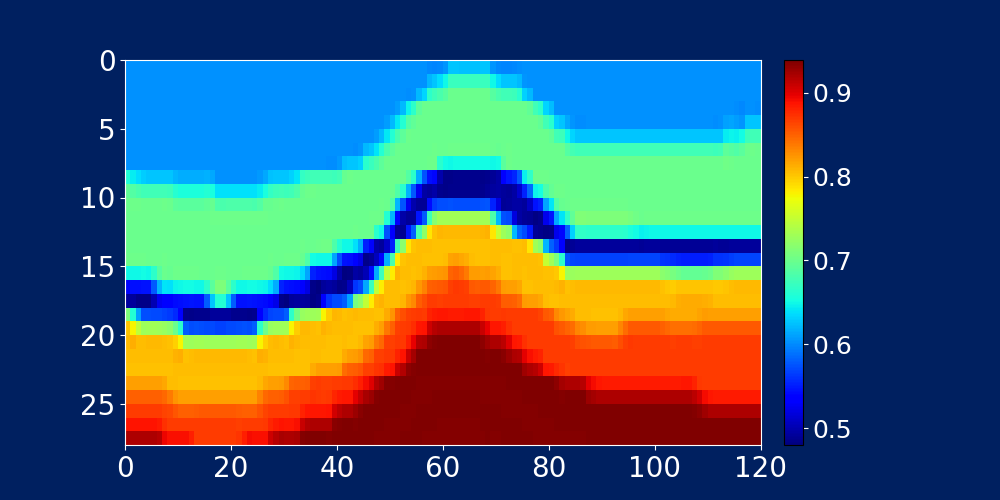

In [8]:
imagesc(V_p_d)
imagesc(V_s_d)

In [9]:
phi_c = 0.4
n=1.667
f = 0.1
f2 = 1e-3
rho_w = 1000*f2
rho_g = 0.92*f2
g = 9.81
K_wat = 2.2#*10+9
K_gas = 1.01e-4#*10+9
K_s = 1/2*(torch.sum(f_i*K_i)+(torch.sum(f_i/K_i))**(-1))
# n2=5
# K_s = 22.3242-n2
# G_s = 1/2*(torch.sum(f_i*G_i)+(torch.sum(f_i/G_i))**(-1))
# G_s = 21.2063-n2
# rho_s = 1745*f2
n2=0
K_s = 42.6825-n2
G_s = 1/2*(torch.sum(f_i*G_i)+(torch.sum(f_i/G_i))**(-1))
G_s = 41.0340-n2
rho_s = 2645*f2
a=0.3
r_w = 50
mm = 2.2
nn = 1.8
nu_s = 1/2*(3*K_s-2*G_s)/(3*K_s+G_s)
print(nu_s)
phi_inv = 0.1*torch.ones_like(V_s_d)
# phi_inv  = 0.5-V_s_d/torch.max(V_s_d)/2
# S_w_inv  = V_s_d/torch.max(V_s_d)
S_w_inv  = 1*torch.ones_like(V_s_d)
for i in range(3000):
    phi  = phi_inv.clone()
    S_w = S_w_inv.clone()
    S_w.requires_grad=True
    phi.requires_grad=True
    nu_s = 1/2*(3*K_s-2*G_s)/(3*K_s+G_s)
    D = torch.arange(1,29).repeat(120,1).T/1000
    rho_b = phi*(S_w*rho_w+(1-S_w)*rho_g)+(1-phi)*rho_s
#     P_eff = (rho_b-S_w*rho_w)*g*D
    P_eff = torch.where(S_w<0.90,(rho_b)*g*D,(rho_b-rho_w)*g*D)
    K_HM = ((n**2*(1-phi_c)**2*G_s**2)/(18*math.pi**2*(1-nu_s)**2)*P_eff)**(1/3)
    G_HM = (2+3*f-(1-3*f)*nu_s)/(5*(2-nu_s))*((3*n**2*(1-phi_c)**2*G_s**2)/(2*math.pi**2*(1-nu_s)**2)*P_eff)**(1/3)
    Z = G_HM/6*((9*K_HM+8*G_HM)/(K_HM+2*G_HM))
    K_dry = torch.where(phi < phi_c, (((phi/phi_c)/(K_HM+4/3*G_HM))+((1-phi/phi_c)/(K_s+4/3*G_HM)))**(-1)-4/3*G_HM,\
                    ((((1-phi)/(1-phi_c))/(K_HM+4/3*G_HM))+(((phi-phi_c)/(1-phi_c))/(4/3*G_HM)))**(-1)-4/3*G_HM)
    G_dry = torch.where(phi < phi_c, (((phi/phi_c)/(G_HM+Z))+((1-phi/phi_c)/(G_s+Z)))**(-1)-Z,\
                    ((((1-phi)/(1-phi_c))/(G_HM+Z))+(((phi-phi_c)/(1-phi_c))/(Z)))**(-1)-Z)
    K_sat_wat = K_s*((phi*K_dry-(((1-phi)*K_wat*K_dry)/(K_s))+K_wat)/((1-phi)*K_wat+phi*K_s-K_wat*K_dry/K_s+1e-15))
    K_sat_gas = K_s*((phi*K_dry-(((1-phi)*K_gas*K_dry)/(K_s))+K_gas)/((1-phi)*K_gas+phi*K_s-K_gas*K_dry/K_s+1e-15))
    K_sat = ((S_w/(K_sat_wat+4/3*G_dry))+((1-S_w)/(K_sat_gas+4/3*G_dry)))**(-1)-4/3*G_dry
#     print(torch.any(torch.isnan(K_dry)),torch.any(torch.isnan(G_dry)),K_sat)
    G_sat = G_dry
    v_p = torch.sqrt((K_sat+4/3*G_sat)/rho_b)
    v_s = torch.sqrt(G_sat/rho_b)
    resistivity = a*r_w*phi**(-mm)*S_w**(-nn)
    resixinv = torch.mean(torch.log10(resistivity),dim=1)
    loss = (torch.sum((v_p-V_p_d)**2) + torch.sum((v_s-V_s_d)**2))/35/235/2 +\
       torch.sum((v_p/v_s-V_p_d/V_s_d)**2)/35/235/2# + torch.sum((resixinv - resinew)**2)/35 
#     torch.sum((F.relu(torch.diff(-S_w*D,dim=0)))**2)*150 #+ torch.sum((F.relu(torch.diff(phi*D,dim=0)))**2)*100


    if torch.any(torch.isnan(loss)):
        break
    print(loss,i,K_s,G_s,rho_s)
#         if loss<0.1:
#             print(loss,i,K_s,G_s)
    loss.backward()
#     S_wgrad = S_w.grad/torch.max(torch.abs(S_w.grad))
    S_wgrad = S_w.grad/torch.max(torch.abs(S_w.grad))
    phigrad = phi.grad/torch.max(torch.abs(phi.grad))
    S_w_inv = S_w_inv - 0.01*S_wgrad
    phi_inv = phi_inv - 0.01*phigrad
    phi_inv = torch.where(phi_inv >= 0.6, 0.6, phi_inv)
    phi_inv = torch.where(phi_inv <= 0.0001, 0.0001, phi_inv)
    S_w_inv = torch.where(S_w_inv <= 0.0001, 0.0001, S_w_inv)
    S_w_inv = torch.where(S_w_inv >= 1., 1., S_w_inv)

0.1359684530832764
tensor(0.7898, grad_fn=<AddBackward0>) 0 42.6825 41.034 2.645
tensor(0.7173, grad_fn=<AddBackward0>) 1 42.6825 41.034 2.645
tensor(0.6518, grad_fn=<AddBackward0>) 2 42.6825 41.034 2.645
tensor(0.5928, grad_fn=<AddBackward0>) 3 42.6825 41.034 2.645
tensor(0.5397, grad_fn=<AddBackward0>) 4 42.6825 41.034 2.645
tensor(0.4920, grad_fn=<AddBackward0>) 5 42.6825 41.034 2.645
tensor(0.4491, grad_fn=<AddBackward0>) 6 42.6825 41.034 2.645
tensor(0.4107, grad_fn=<AddBackward0>) 7 42.6825 41.034 2.645
tensor(0.3763, grad_fn=<AddBackward0>) 8 42.6825 41.034 2.645
tensor(0.3456, grad_fn=<AddBackward0>) 9 42.6825 41.034 2.645
tensor(0.3179, grad_fn=<AddBackward0>) 10 42.6825 41.034 2.645
tensor(0.2936, grad_fn=<AddBackward0>) 11 42.6825 41.034 2.645
tensor(0.2705, grad_fn=<AddBackward0>) 12 42.6825 41.034 2.645
tensor(0.2504, grad_fn=<AddBackward0>) 13 42.6825 41.034 2.645
tensor(0.2320, grad_fn=<AddBackward0>) 14 42.6825 41.034 2.645
tensor(0.2162, grad_fn=<AddBackward0>) 15 42.6

tensor(0.0024, grad_fn=<AddBackward0>) 202 42.6825 41.034 2.645
tensor(0.0024, grad_fn=<AddBackward0>) 203 42.6825 41.034 2.645
tensor(0.0023, grad_fn=<AddBackward0>) 204 42.6825 41.034 2.645
tensor(0.0023, grad_fn=<AddBackward0>) 205 42.6825 41.034 2.645
tensor(0.0023, grad_fn=<AddBackward0>) 206 42.6825 41.034 2.645
tensor(0.0023, grad_fn=<AddBackward0>) 207 42.6825 41.034 2.645
tensor(0.0023, grad_fn=<AddBackward0>) 208 42.6825 41.034 2.645
tensor(0.0022, grad_fn=<AddBackward0>) 209 42.6825 41.034 2.645
tensor(0.0022, grad_fn=<AddBackward0>) 210 42.6825 41.034 2.645
tensor(0.0022, grad_fn=<AddBackward0>) 211 42.6825 41.034 2.645
tensor(0.0022, grad_fn=<AddBackward0>) 212 42.6825 41.034 2.645
tensor(0.0021, grad_fn=<AddBackward0>) 213 42.6825 41.034 2.645
tensor(0.0021, grad_fn=<AddBackward0>) 214 42.6825 41.034 2.645
tensor(0.0021, grad_fn=<AddBackward0>) 215 42.6825 41.034 2.645
tensor(0.0021, grad_fn=<AddBackward0>) 216 42.6825 41.034 2.645
tensor(0.0021, grad_fn=<AddBackward0>) 2

tensor(0.0009, grad_fn=<AddBackward0>) 350 42.6825 41.034 2.645
tensor(0.0009, grad_fn=<AddBackward0>) 351 42.6825 41.034 2.645
tensor(0.0009, grad_fn=<AddBackward0>) 352 42.6825 41.034 2.645
tensor(0.0009, grad_fn=<AddBackward0>) 353 42.6825 41.034 2.645
tensor(0.0009, grad_fn=<AddBackward0>) 354 42.6825 41.034 2.645
tensor(0.0009, grad_fn=<AddBackward0>) 355 42.6825 41.034 2.645
tensor(0.0009, grad_fn=<AddBackward0>) 356 42.6825 41.034 2.645
tensor(0.0009, grad_fn=<AddBackward0>) 357 42.6825 41.034 2.645
tensor(0.0009, grad_fn=<AddBackward0>) 358 42.6825 41.034 2.645
tensor(0.0009, grad_fn=<AddBackward0>) 359 42.6825 41.034 2.645
tensor(0.0009, grad_fn=<AddBackward0>) 360 42.6825 41.034 2.645
tensor(0.0009, grad_fn=<AddBackward0>) 361 42.6825 41.034 2.645
tensor(0.0009, grad_fn=<AddBackward0>) 362 42.6825 41.034 2.645
tensor(0.0009, grad_fn=<AddBackward0>) 363 42.6825 41.034 2.645
tensor(0.0009, grad_fn=<AddBackward0>) 364 42.6825 41.034 2.645
tensor(0.0009, grad_fn=<AddBackward0>) 3

tensor(0.0007, grad_fn=<AddBackward0>) 496 42.6825 41.034 2.645
tensor(0.0007, grad_fn=<AddBackward0>) 497 42.6825 41.034 2.645
tensor(0.0007, grad_fn=<AddBackward0>) 498 42.6825 41.034 2.645
tensor(0.0007, grad_fn=<AddBackward0>) 499 42.6825 41.034 2.645
tensor(0.0007, grad_fn=<AddBackward0>) 500 42.6825 41.034 2.645
tensor(0.0007, grad_fn=<AddBackward0>) 501 42.6825 41.034 2.645
tensor(0.0007, grad_fn=<AddBackward0>) 502 42.6825 41.034 2.645
tensor(0.0007, grad_fn=<AddBackward0>) 503 42.6825 41.034 2.645
tensor(0.0007, grad_fn=<AddBackward0>) 504 42.6825 41.034 2.645
tensor(0.0007, grad_fn=<AddBackward0>) 505 42.6825 41.034 2.645
tensor(0.0007, grad_fn=<AddBackward0>) 506 42.6825 41.034 2.645
tensor(0.0007, grad_fn=<AddBackward0>) 507 42.6825 41.034 2.645
tensor(0.0007, grad_fn=<AddBackward0>) 508 42.6825 41.034 2.645
tensor(0.0007, grad_fn=<AddBackward0>) 509 42.6825 41.034 2.645
tensor(0.0007, grad_fn=<AddBackward0>) 510 42.6825 41.034 2.645
tensor(0.0007, grad_fn=<AddBackward0>) 5

tensor(0.0006, grad_fn=<AddBackward0>) 642 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 643 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 644 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 645 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 646 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 647 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 648 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 649 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 650 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 651 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 652 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 653 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 654 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 655 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 656 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 6

tensor(0.0006, grad_fn=<AddBackward0>) 789 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 790 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 791 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 792 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 793 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 794 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 795 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 796 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 797 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 798 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 799 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 800 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 801 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 802 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 803 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 8

tensor(0.0006, grad_fn=<AddBackward0>) 935 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 936 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 937 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 938 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 939 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 940 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 941 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 942 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 943 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 944 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 945 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 946 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 947 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 948 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 949 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 9

tensor(0.0006, grad_fn=<AddBackward0>) 1083 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1084 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1085 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1086 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1087 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1088 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1089 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1090 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1091 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1092 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1093 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1094 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1095 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1096 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1097 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<A

tensor(0.0006, grad_fn=<AddBackward0>) 1229 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1230 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1231 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1232 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1233 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1234 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1235 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1236 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1237 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1238 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1239 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1240 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1241 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1242 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1243 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<A

tensor(0.0006, grad_fn=<AddBackward0>) 1378 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1379 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1380 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1381 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1382 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1383 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1384 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1385 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1386 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1387 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1388 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1389 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1390 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1391 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1392 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<A

tensor(0.0006, grad_fn=<AddBackward0>) 1527 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1528 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1529 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1530 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1531 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1532 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1533 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1534 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1535 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1536 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1537 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1538 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1539 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1540 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1541 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<A

tensor(0.0006, grad_fn=<AddBackward0>) 1674 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1675 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1676 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1677 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1678 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1679 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1680 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1681 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1682 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1683 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1684 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1685 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1686 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1687 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1688 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<A

tensor(0.0006, grad_fn=<AddBackward0>) 1822 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1823 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1824 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1825 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1826 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1827 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1828 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1829 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1830 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1831 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1832 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1833 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1834 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1835 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1836 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<A

tensor(0.0006, grad_fn=<AddBackward0>) 1970 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1971 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1972 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1973 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1974 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1975 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1976 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1977 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1978 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1979 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1980 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1981 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1982 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1983 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 1984 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<A

tensor(0.0006, grad_fn=<AddBackward0>) 2116 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2117 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2118 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2119 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2120 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2121 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2122 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2123 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2124 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2125 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2126 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2127 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2128 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2129 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2130 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<A

tensor(0.0006, grad_fn=<AddBackward0>) 2264 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2265 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2266 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2267 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2268 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2269 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2270 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2271 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2272 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2273 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2274 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2275 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2276 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2277 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2278 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<A

tensor(0.0006, grad_fn=<AddBackward0>) 2410 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2411 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2412 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2413 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2414 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2415 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2416 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2417 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2418 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2419 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2420 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2421 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2422 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2423 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2424 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<A

tensor(0.0006, grad_fn=<AddBackward0>) 2558 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2559 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2560 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2561 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2562 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2563 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2564 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2565 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2566 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2567 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2568 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2569 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2570 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2571 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2572 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<A

tensor(0.0006, grad_fn=<AddBackward0>) 2705 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2706 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2707 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2708 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2709 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2710 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2711 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2712 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2713 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2714 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2715 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2716 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2717 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2718 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2719 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<A

tensor(0.0006, grad_fn=<AddBackward0>) 2850 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2851 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2852 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2853 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2854 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2855 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2856 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2857 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2858 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2859 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2860 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2861 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2862 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2863 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2864 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<A

tensor(0.0006, grad_fn=<AddBackward0>) 2998 42.6825 41.034 2.645
tensor(0.0006, grad_fn=<AddBackward0>) 2999 42.6825 41.034 2.645


<IPython.core.display.Javascript object>


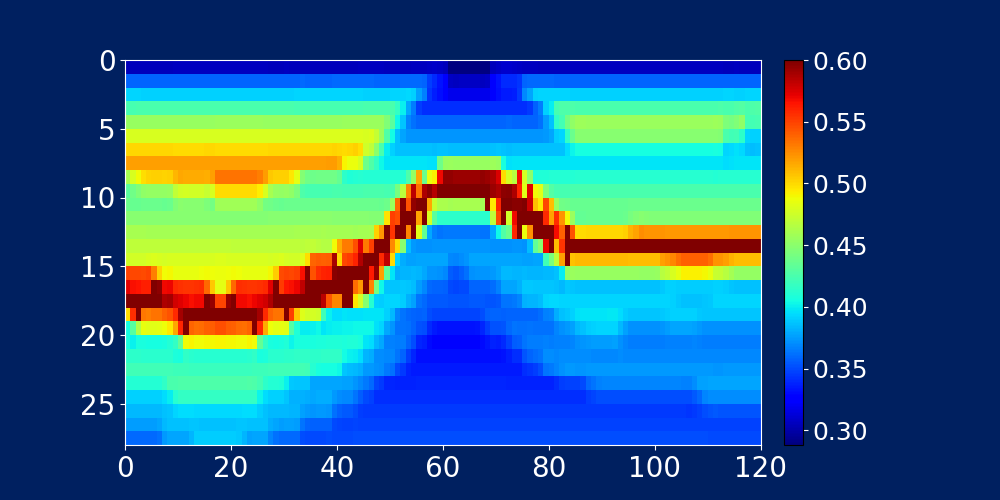

<IPython.core.display.Javascript object>


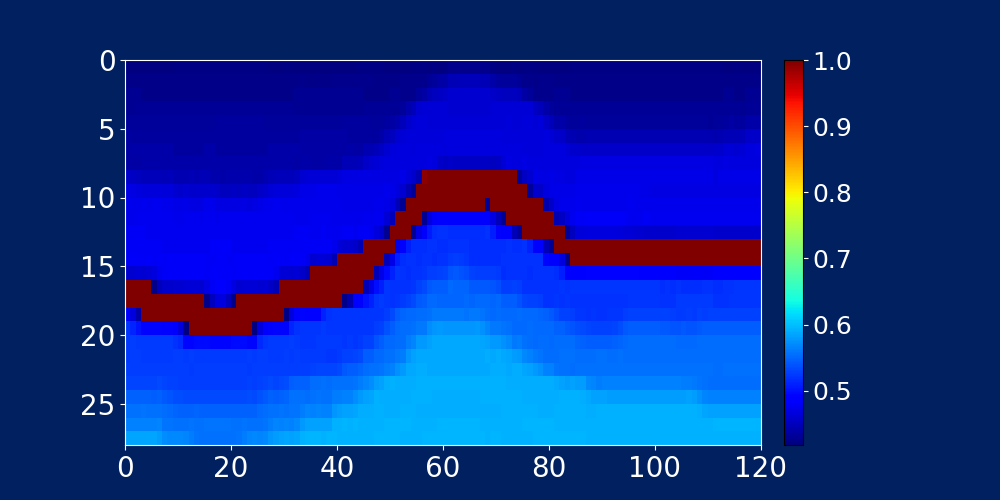

<IPython.core.display.Javascript object>


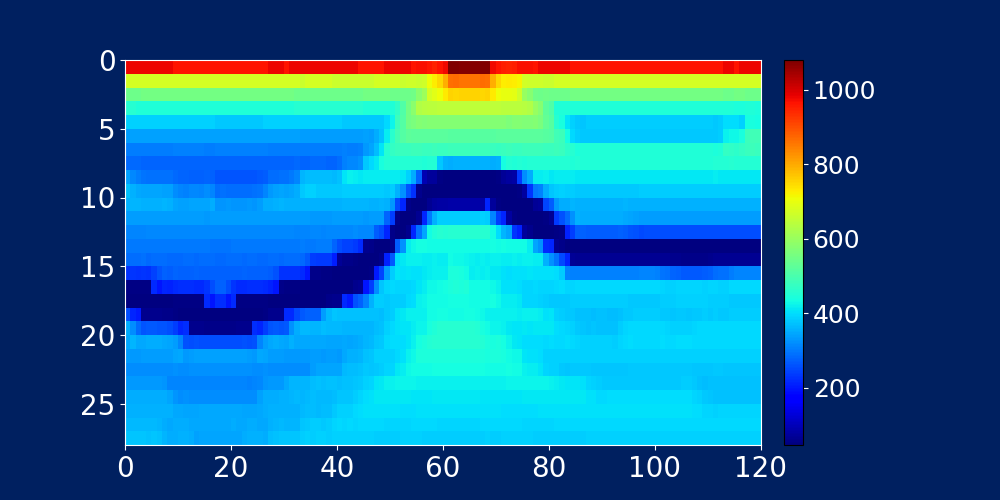

In [10]:
imagesc(phi_inv)
imagesc(S_w_inv)
imagesc(resistivity)


In [11]:
resinew = torch.mean(torch.log10(resistivity),dim=1).data
phi_obs = phi_inv
S_w_obs = S_w_inv
resistivity_obs = resistivity

In [12]:
resinew

tensor([2.9898, 2.8382, 2.7590, 2.6861, 2.6289, 2.6014, 2.5959, 2.5659, 2.4311,
        2.3966, 2.3829, 2.4275, 2.4058, 2.2019, 2.2383, 2.4130, 2.3898, 2.3109,
        2.3769, 2.4844, 2.5674, 2.5767, 2.5677, 2.5721, 2.5793, 2.5847, 2.5818,
        2.5778])

In [13]:
model_list=h5py.File('phitest.mat')  
V_p_d = torch.from_numpy(model_list['velocityp'][:].astype('float32')).T
V_s_d = torch.from_numpy(model_list['velocitys'][:].astype('float32')).T
V_s_d = V_s_d/1000
V_p_d = V_p_d/1000
phi_inv = 0.33*torch.ones_like(V_s_d)
S_w_inv  = 0.1*torch.ones_like(V_s_d)

<IPython.core.display.Javascript object>


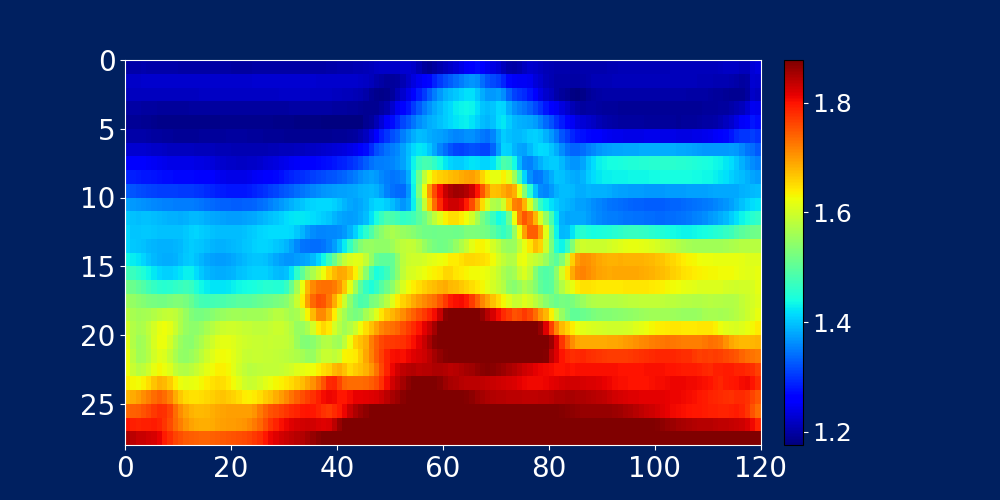

<IPython.core.display.Javascript object>


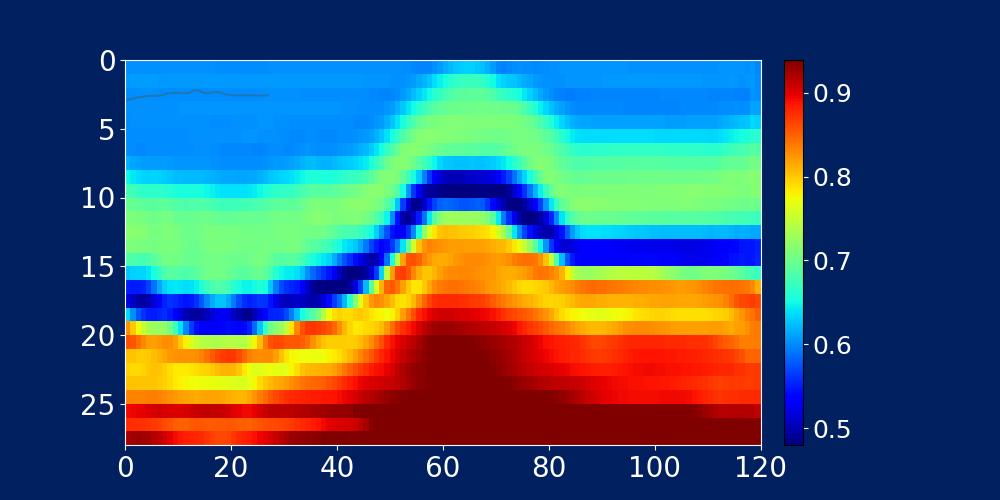

In [14]:
imagesc(V_p_d)
imagesc(V_s_d)

In [15]:
V_s_d

tensor([[0.6026, 0.6033, 0.6033,  ..., 0.6022, 0.6046, 0.5997],
        [0.6065, 0.6076, 0.6082,  ..., 0.6040, 0.6070, 0.6010],
        [0.6010, 0.6018, 0.6023,  ..., 0.5950, 0.6040, 0.6009],
        ...,
        [0.8935, 0.8951, 0.8977,  ..., 0.9181, 0.9167, 0.9136],
        [0.8762, 0.8753, 0.8751,  ..., 0.9390, 0.9390, 0.9369],
        [0.9226, 0.9252, 0.9271,  ..., 0.9390, 0.9390, 0.9390]])

In [16]:
plt.plot(resinew.detach().numpy())
resinew

tensor([2.9898, 2.8382, 2.7590, 2.6861, 2.6289, 2.6014, 2.5959, 2.5659, 2.4311,
        2.3966, 2.3829, 2.4275, 2.4058, 2.2019, 2.2383, 2.4130, 2.3898, 2.3109,
        2.3769, 2.4844, 2.5674, 2.5767, 2.5677, 2.5721, 2.5793, 2.5847, 2.5818,
        2.5778])

In [17]:
phi_inv = 0.33*torch.ones_like(V_s_d)
S_w_inv  = 0.1*torch.ones_like(V_s_d)

In [18]:
phi_c = 0.4
n=1.667
f = 0.1
f2 = 1e-3
rho_w = 1000*f2
rho_g = 0.92*f2
g = 9.81
K_wat = 2.2#*10+9
K_gas = 1.01e-4#*10+9
K_s = 1/2*(torch.sum(f_i*K_i)+(torch.sum(f_i/K_i))**(-1))
# n2=5
# K_s = 22.3242-n2
# G_s = 1/2*(torch.sum(f_i*G_i)+(torch.sum(f_i/G_i))**(-1))
# G_s = 21.2063-n2
# rho_s = 1745*f2
n2=0
K_s = 42.6825-n2
G_s = 1/2*(torch.sum(f_i*G_i)+(torch.sum(f_i/G_i))**(-1))
G_s = 41.0340-n2
rho_s = 2645*f2
a=0.3
r_w = 50
mm = 2.2
nn = 1.8
nu_s = 1/2*(3*K_s-2*G_s)/(3*K_s+G_s)
print(nu_s)
phi_inv = 0.1*torch.ones_like(V_s_d)
# phi_inv  = 0.5-V_s_d/torch.max(V_s_d)/2
# S_w_inv  = V_s_d/torch.max(V_s_d)
S_w_inv  = 1*torch.ones_like(V_s_d)
for i in range(1000):
    phi  = phi_inv.clone()
    S_w = S_w_inv.clone()
    S_w.requires_grad=True
    phi.requires_grad=True
    nu_s = 1/2*(3*K_s-2*G_s)/(3*K_s+G_s)
    D = torch.arange(1,29).repeat(120,1).T/1000
    rho_b = phi*(S_w*rho_w+(1-S_w)*rho_g)+(1-phi)*rho_s
#     P_eff = (rho_b-S_w*rho_w)*g*D
    P_eff = torch.where(S_w<0.90,(rho_b)*g*D,(rho_b-rho_w)*g*D)
    K_HM = ((n**2*(1-phi_c)**2*G_s**2)/(18*math.pi**2*(1-nu_s)**2)*P_eff)**(1/3)
    G_HM = (2+3*f-(1-3*f)*nu_s)/(5*(2-nu_s))*((3*n**2*(1-phi_c)**2*G_s**2)/(2*math.pi**2*(1-nu_s)**2)*P_eff)**(1/3)
    Z = G_HM/6*((9*K_HM+8*G_HM)/(K_HM+2*G_HM))
    K_dry = torch.where(phi < phi_c, (((phi/phi_c)/(K_HM+4/3*G_HM))+((1-phi/phi_c)/(K_s+4/3*G_HM)))**(-1)-4/3*G_HM,\
                    ((((1-phi)/(1-phi_c))/(K_HM+4/3*G_HM))+(((phi-phi_c)/(1-phi_c))/(4/3*G_HM)))**(-1)-4/3*G_HM)
    G_dry = torch.where(phi < phi_c, (((phi/phi_c)/(G_HM+Z))+((1-phi/phi_c)/(G_s+Z)))**(-1)-Z,\
                    ((((1-phi)/(1-phi_c))/(G_HM+Z))+(((phi-phi_c)/(1-phi_c))/(Z)))**(-1)-Z)
    K_sat_wat = K_s*((phi*K_dry-(((1-phi)*K_wat*K_dry)/(K_s))+K_wat)/((1-phi)*K_wat+phi*K_s-K_wat*K_dry/K_s+1e-15))
    K_sat_gas = K_s*((phi*K_dry-(((1-phi)*K_gas*K_dry)/(K_s))+K_gas)/((1-phi)*K_gas+phi*K_s-K_gas*K_dry/K_s+1e-15))
    K_sat = ((S_w/(K_sat_wat+4/3*G_dry))+((1-S_w)/(K_sat_gas+4/3*G_dry)))**(-1)-4/3*G_dry
#     print(torch.any(torch.isnan(K_dry)),torch.any(torch.isnan(G_dry)),K_sat)
    G_sat = G_dry
    v_p = torch.sqrt((K_sat+4/3*G_sat)/rho_b)
    v_s = torch.sqrt(G_sat/rho_b)
    resistivity = a*r_w*phi**(-mm)*S_w**(-nn)
    resixinv = torch.mean(torch.log10(resistivity),dim=1)
    loss = (torch.sum((v_p-V_p_d)**2) + torch.sum((v_s-V_s_d)**2))/35/235/2 +\
       torch.sum((v_p/v_s-V_p_d/V_s_d)**2)/35/235/2 + torch.sum((resixinv - resinew)**2)/35*1 
#     torch.sum((F.relu(torch.diff(-S_w*D,dim=0)))**2)*150 #+ torch.sum((F.relu(torch.diff(phi*D,dim=0)))**2)*100


    if torch.any(torch.isnan(loss)):
        break
    print(loss,i,K_s,G_s,rho_s)
#         if loss<0.1:
#             print(loss,i,K_s,G_s)
    loss.backward()
#     S_wgrad = S_w.grad/torch.max(torch.abs(S_w.grad))
    S_wgrad = S_w.grad/torch.max(torch.abs(S_w.grad))
    phigrad = phi.grad/torch.max(torch.abs(phi.grad))
    S_w_inv = S_w_inv - 0.01*S_wgrad
    phi_inv = phi_inv - 0.01*phigrad
    phi_inv = torch.where(phi_inv >= 0.6, 0.6, phi_inv)
    phi_inv = torch.where(phi_inv <= 0.0001, 0.0001, phi_inv)
    S_w_inv = torch.where(S_w_inv <= 0.0001, 0.0001, S_w_inv)
    S_w_inv = torch.where(S_w_inv >= 1., 1., S_w_inv)

0.1359684530832764
tensor(1.3812, grad_fn=<AddBackward0>) 0 42.6825 41.034 2.645
tensor(1.2171, grad_fn=<AddBackward0>) 1 42.6825 41.034 2.645
tensor(1.0731, grad_fn=<AddBackward0>) 2 42.6825 41.034 2.645
tensor(0.9471, grad_fn=<AddBackward0>) 3 42.6825 41.034 2.645
tensor(0.8369, grad_fn=<AddBackward0>) 4 42.6825 41.034 2.645
tensor(0.7408, grad_fn=<AddBackward0>) 5 42.6825 41.034 2.645
tensor(0.6570, grad_fn=<AddBackward0>) 6 42.6825 41.034 2.645
tensor(0.5838, grad_fn=<AddBackward0>) 7 42.6825 41.034 2.645
tensor(0.5199, grad_fn=<AddBackward0>) 8 42.6825 41.034 2.645
tensor(0.4642, grad_fn=<AddBackward0>) 9 42.6825 41.034 2.645
tensor(0.4155, grad_fn=<AddBackward0>) 10 42.6825 41.034 2.645
tensor(0.3737, grad_fn=<AddBackward0>) 11 42.6825 41.034 2.645
tensor(0.3361, grad_fn=<AddBackward0>) 12 42.6825 41.034 2.645
tensor(0.3035, grad_fn=<AddBackward0>) 13 42.6825 41.034 2.645
tensor(0.2755, grad_fn=<AddBackward0>) 14 42.6825 41.034 2.645
tensor(0.2506, grad_fn=<AddBackward0>) 15 42.6

tensor(0.0036, grad_fn=<AddBackward0>) 131 42.6825 41.034 2.645
tensor(0.0035, grad_fn=<AddBackward0>) 132 42.6825 41.034 2.645
tensor(0.0034, grad_fn=<AddBackward0>) 133 42.6825 41.034 2.645
tensor(0.0033, grad_fn=<AddBackward0>) 134 42.6825 41.034 2.645
tensor(0.0032, grad_fn=<AddBackward0>) 135 42.6825 41.034 2.645
tensor(0.0031, grad_fn=<AddBackward0>) 136 42.6825 41.034 2.645
tensor(0.0030, grad_fn=<AddBackward0>) 137 42.6825 41.034 2.645
tensor(0.0029, grad_fn=<AddBackward0>) 138 42.6825 41.034 2.645
tensor(0.0028, grad_fn=<AddBackward0>) 139 42.6825 41.034 2.645
tensor(0.0028, grad_fn=<AddBackward0>) 140 42.6825 41.034 2.645
tensor(0.0027, grad_fn=<AddBackward0>) 141 42.6825 41.034 2.645
tensor(0.0026, grad_fn=<AddBackward0>) 142 42.6825 41.034 2.645
tensor(0.0025, grad_fn=<AddBackward0>) 143 42.6825 41.034 2.645
tensor(0.0025, grad_fn=<AddBackward0>) 144 42.6825 41.034 2.645
tensor(0.0024, grad_fn=<AddBackward0>) 145 42.6825 41.034 2.645
tensor(0.0024, grad_fn=<AddBackward0>) 1

tensor(0.0003, grad_fn=<AddBackward0>) 266 42.6825 41.034 2.645
tensor(0.0003, grad_fn=<AddBackward0>) 267 42.6825 41.034 2.645
tensor(0.0003, grad_fn=<AddBackward0>) 268 42.6825 41.034 2.645
tensor(0.0003, grad_fn=<AddBackward0>) 269 42.6825 41.034 2.645
tensor(0.0003, grad_fn=<AddBackward0>) 270 42.6825 41.034 2.645
tensor(0.0003, grad_fn=<AddBackward0>) 271 42.6825 41.034 2.645
tensor(0.0003, grad_fn=<AddBackward0>) 272 42.6825 41.034 2.645
tensor(0.0003, grad_fn=<AddBackward0>) 273 42.6825 41.034 2.645
tensor(0.0003, grad_fn=<AddBackward0>) 274 42.6825 41.034 2.645
tensor(0.0003, grad_fn=<AddBackward0>) 275 42.6825 41.034 2.645
tensor(0.0003, grad_fn=<AddBackward0>) 276 42.6825 41.034 2.645
tensor(0.0003, grad_fn=<AddBackward0>) 277 42.6825 41.034 2.645
tensor(0.0003, grad_fn=<AddBackward0>) 278 42.6825 41.034 2.645
tensor(0.0003, grad_fn=<AddBackward0>) 279 42.6825 41.034 2.645
tensor(0.0003, grad_fn=<AddBackward0>) 280 42.6825 41.034 2.645
tensor(0.0003, grad_fn=<AddBackward0>) 2

tensor(0.0002, grad_fn=<AddBackward0>) 395 42.6825 41.034 2.645
tensor(0.0002, grad_fn=<AddBackward0>) 396 42.6825 41.034 2.645
tensor(0.0002, grad_fn=<AddBackward0>) 397 42.6825 41.034 2.645
tensor(0.0002, grad_fn=<AddBackward0>) 398 42.6825 41.034 2.645
tensor(0.0002, grad_fn=<AddBackward0>) 399 42.6825 41.034 2.645
tensor(0.0002, grad_fn=<AddBackward0>) 400 42.6825 41.034 2.645
tensor(0.0002, grad_fn=<AddBackward0>) 401 42.6825 41.034 2.645
tensor(0.0002, grad_fn=<AddBackward0>) 402 42.6825 41.034 2.645
tensor(0.0002, grad_fn=<AddBackward0>) 403 42.6825 41.034 2.645
tensor(0.0002, grad_fn=<AddBackward0>) 404 42.6825 41.034 2.645
tensor(0.0002, grad_fn=<AddBackward0>) 405 42.6825 41.034 2.645
tensor(0.0002, grad_fn=<AddBackward0>) 406 42.6825 41.034 2.645
tensor(0.0002, grad_fn=<AddBackward0>) 407 42.6825 41.034 2.645
tensor(0.0002, grad_fn=<AddBackward0>) 408 42.6825 41.034 2.645
tensor(0.0002, grad_fn=<AddBackward0>) 409 42.6825 41.034 2.645
tensor(0.0002, grad_fn=<AddBackward0>) 4

tensor(0.0002, grad_fn=<AddBackward0>) 529 42.6825 41.034 2.645
tensor(0.0002, grad_fn=<AddBackward0>) 530 42.6825 41.034 2.645
tensor(0.0002, grad_fn=<AddBackward0>) 531 42.6825 41.034 2.645
tensor(0.0002, grad_fn=<AddBackward0>) 532 42.6825 41.034 2.645
tensor(0.0002, grad_fn=<AddBackward0>) 533 42.6825 41.034 2.645
tensor(0.0002, grad_fn=<AddBackward0>) 534 42.6825 41.034 2.645
tensor(0.0002, grad_fn=<AddBackward0>) 535 42.6825 41.034 2.645
tensor(0.0002, grad_fn=<AddBackward0>) 536 42.6825 41.034 2.645
tensor(0.0002, grad_fn=<AddBackward0>) 537 42.6825 41.034 2.645
tensor(0.0002, grad_fn=<AddBackward0>) 538 42.6825 41.034 2.645
tensor(0.0002, grad_fn=<AddBackward0>) 539 42.6825 41.034 2.645
tensor(0.0002, grad_fn=<AddBackward0>) 540 42.6825 41.034 2.645
tensor(0.0002, grad_fn=<AddBackward0>) 541 42.6825 41.034 2.645
tensor(0.0002, grad_fn=<AddBackward0>) 542 42.6825 41.034 2.645
tensor(0.0002, grad_fn=<AddBackward0>) 543 42.6825 41.034 2.645
tensor(0.0002, grad_fn=<AddBackward0>) 5

tensor(0.0002, grad_fn=<AddBackward0>) 663 42.6825 41.034 2.645
tensor(0.0002, grad_fn=<AddBackward0>) 664 42.6825 41.034 2.645
tensor(0.0002, grad_fn=<AddBackward0>) 665 42.6825 41.034 2.645
tensor(0.0002, grad_fn=<AddBackward0>) 666 42.6825 41.034 2.645
tensor(0.0002, grad_fn=<AddBackward0>) 667 42.6825 41.034 2.645
tensor(0.0002, grad_fn=<AddBackward0>) 668 42.6825 41.034 2.645
tensor(0.0002, grad_fn=<AddBackward0>) 669 42.6825 41.034 2.645
tensor(0.0002, grad_fn=<AddBackward0>) 670 42.6825 41.034 2.645
tensor(0.0002, grad_fn=<AddBackward0>) 671 42.6825 41.034 2.645
tensor(0.0002, grad_fn=<AddBackward0>) 672 42.6825 41.034 2.645
tensor(0.0002, grad_fn=<AddBackward0>) 673 42.6825 41.034 2.645
tensor(0.0002, grad_fn=<AddBackward0>) 674 42.6825 41.034 2.645
tensor(0.0002, grad_fn=<AddBackward0>) 675 42.6825 41.034 2.645
tensor(0.0002, grad_fn=<AddBackward0>) 676 42.6825 41.034 2.645
tensor(0.0002, grad_fn=<AddBackward0>) 677 42.6825 41.034 2.645
tensor(0.0002, grad_fn=<AddBackward0>) 6

tensor(0.0002, grad_fn=<AddBackward0>) 795 42.6825 41.034 2.645
tensor(0.0002, grad_fn=<AddBackward0>) 796 42.6825 41.034 2.645
tensor(0.0002, grad_fn=<AddBackward0>) 797 42.6825 41.034 2.645
tensor(0.0002, grad_fn=<AddBackward0>) 798 42.6825 41.034 2.645
tensor(0.0002, grad_fn=<AddBackward0>) 799 42.6825 41.034 2.645
tensor(0.0002, grad_fn=<AddBackward0>) 800 42.6825 41.034 2.645
tensor(0.0002, grad_fn=<AddBackward0>) 801 42.6825 41.034 2.645
tensor(0.0002, grad_fn=<AddBackward0>) 802 42.6825 41.034 2.645
tensor(0.0002, grad_fn=<AddBackward0>) 803 42.6825 41.034 2.645
tensor(0.0002, grad_fn=<AddBackward0>) 804 42.6825 41.034 2.645
tensor(0.0002, grad_fn=<AddBackward0>) 805 42.6825 41.034 2.645
tensor(0.0002, grad_fn=<AddBackward0>) 806 42.6825 41.034 2.645
tensor(0.0002, grad_fn=<AddBackward0>) 807 42.6825 41.034 2.645
tensor(0.0002, grad_fn=<AddBackward0>) 808 42.6825 41.034 2.645
tensor(0.0002, grad_fn=<AddBackward0>) 809 42.6825 41.034 2.645
tensor(0.0002, grad_fn=<AddBackward0>) 8

tensor(0.0002, grad_fn=<AddBackward0>) 929 42.6825 41.034 2.645
tensor(0.0002, grad_fn=<AddBackward0>) 930 42.6825 41.034 2.645
tensor(0.0002, grad_fn=<AddBackward0>) 931 42.6825 41.034 2.645
tensor(0.0002, grad_fn=<AddBackward0>) 932 42.6825 41.034 2.645
tensor(0.0002, grad_fn=<AddBackward0>) 933 42.6825 41.034 2.645
tensor(0.0002, grad_fn=<AddBackward0>) 934 42.6825 41.034 2.645
tensor(0.0002, grad_fn=<AddBackward0>) 935 42.6825 41.034 2.645
tensor(0.0002, grad_fn=<AddBackward0>) 936 42.6825 41.034 2.645
tensor(0.0002, grad_fn=<AddBackward0>) 937 42.6825 41.034 2.645
tensor(0.0002, grad_fn=<AddBackward0>) 938 42.6825 41.034 2.645
tensor(0.0002, grad_fn=<AddBackward0>) 939 42.6825 41.034 2.645
tensor(0.0002, grad_fn=<AddBackward0>) 940 42.6825 41.034 2.645
tensor(0.0002, grad_fn=<AddBackward0>) 941 42.6825 41.034 2.645
tensor(0.0002, grad_fn=<AddBackward0>) 942 42.6825 41.034 2.645
tensor(0.0002, grad_fn=<AddBackward0>) 943 42.6825 41.034 2.645
tensor(0.0002, grad_fn=<AddBackward0>) 9

In [19]:
NN_resinew = torch.mean(torch.log10(resistivity),dim=1).data
NN_phi = phi_inv.data
NN_S_w = S_w_inv.data
NN_resistivity = resistivity.data

<IPython.core.display.Javascript object>


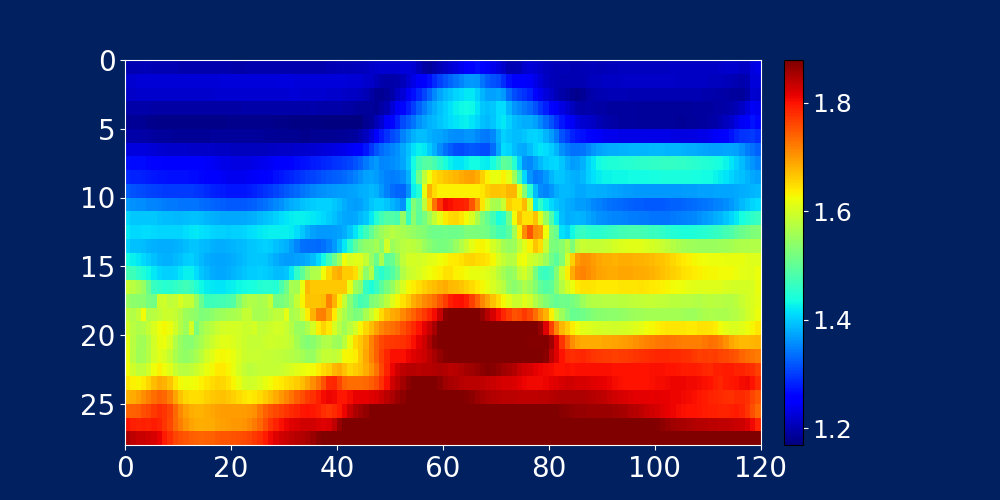

<IPython.core.display.Javascript object>


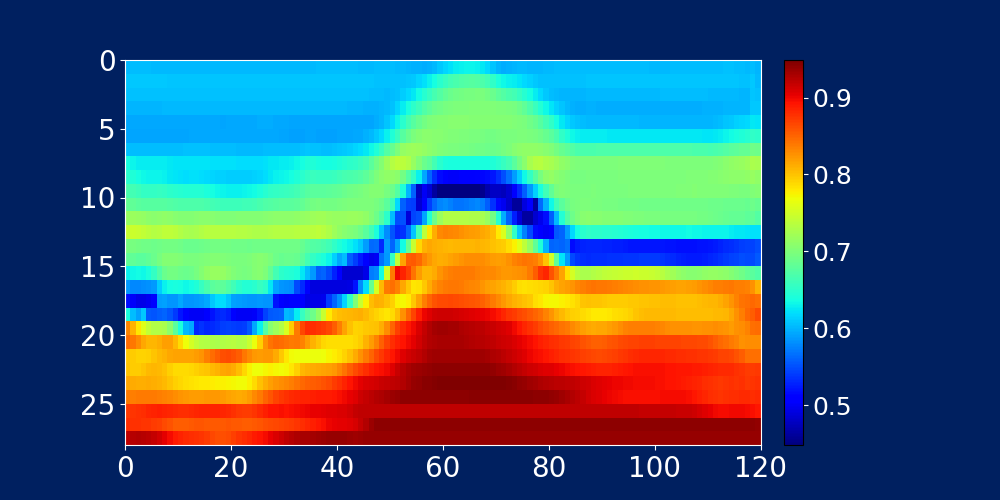

In [20]:
imagesc(v_p)
imagesc(v_s)

<IPython.core.display.Javascript object>


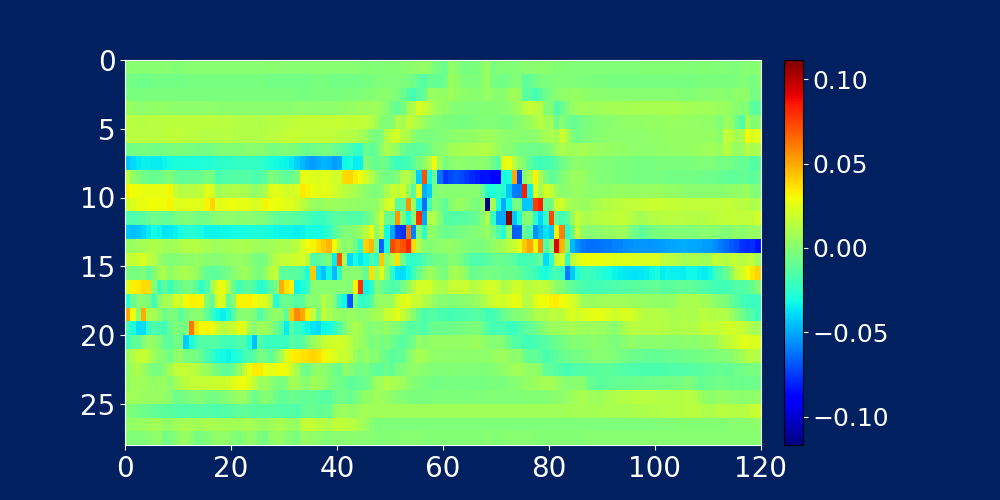

<IPython.core.display.Javascript object>


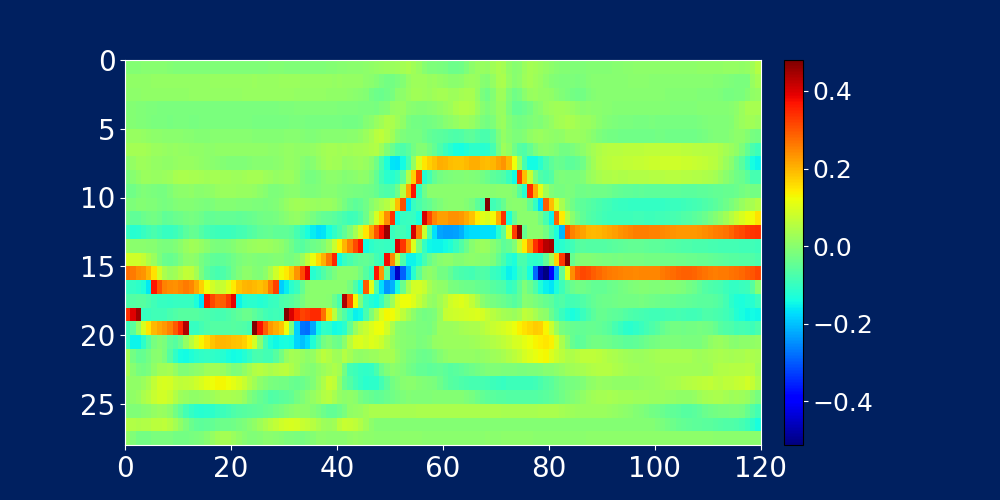

In [21]:
imagesc(NN_phi-phi_obs)
imagesc(NN_S_w-S_w_obs)

In [22]:
print(torch.mean((NN_phi-phi_obs)**2))
print(torch.mean((NN_S_w-S_w_obs)**2))

tensor(0.0003)
tensor(0.0083)


In [23]:
NN_resinew = torch.mean(torch.log10(resistivity),dim=1).data
NN_phi = phi_inv
NN_S_w = S_w_inv
NN_resistivity = resistivity

In [24]:
model_list=h5py.File('phitest.mat')  
V_p_d = torch.from_numpy(model_list['vpFWI2'][:].astype('float32')).T
V_s_d = torch.from_numpy(model_list['vsFWI2'][:].astype('float32')).T
V_s_d = V_s_d/1000
V_p_d = V_p_d/1000
phi_inv = 0.33*torch.ones_like(V_s_d)
S_w_inv  = 0.1*torch.ones_like(V_s_d)

<IPython.core.display.Javascript object>


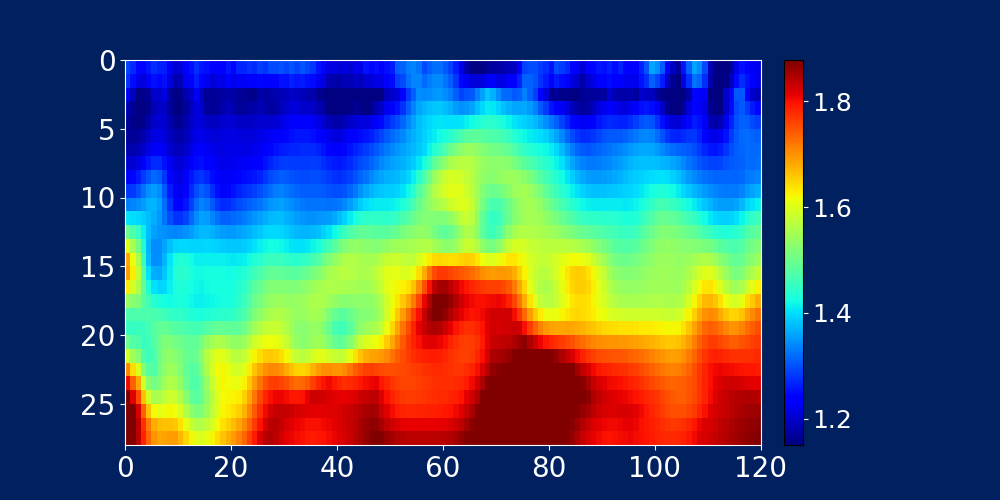

In [25]:
imagesc(V_p_d)

In [27]:
phi_c = 0.4
n=1.667
f = 0.1
f2 = 1e-3
rho_w = 1000*f2
rho_g = 0.92*f2
g = 9.81
K_wat = 2.2#*10+9
K_gas = 1.01e-4#*10+9
K_s = 1/2*(torch.sum(f_i*K_i)+(torch.sum(f_i/K_i))**(-1))
# n2=5
# K_s = 22.3242-n2
# G_s = 1/2*(torch.sum(f_i*G_i)+(torch.sum(f_i/G_i))**(-1))
# G_s = 21.2063-n2
# rho_s = 1745*f2
n2=0
K_s = 42.6825-n2
G_s = 1/2*(torch.sum(f_i*G_i)+(torch.sum(f_i/G_i))**(-1))
G_s = 41.0340-n2
rho_s = 2645*f2
a=0.3
r_w = 50
mm = 2.2
nn = 1.8
nu_s = 1/2*(3*K_s-2*G_s)/(3*K_s+G_s)
print(nu_s)
phi_inv = 0.1*torch.ones_like(V_s_d)
# phi_inv  = 0.5-V_s_d/torch.max(V_s_d)/2
# S_w_inv  = V_s_d/torch.max(V_s_d)
S_w_inv  = 1*torch.ones_like(V_s_d)
for i in range(1000):
    phi  = phi_inv.clone()
    S_w = S_w_inv.clone()
    S_w.requires_grad=True
    phi.requires_grad=True
    nu_s = 1/2*(3*K_s-2*G_s)/(3*K_s+G_s)
    D = torch.arange(1,29).repeat(120,1).T/1000
    rho_b = phi*(S_w*rho_w+(1-S_w)*rho_g)+(1-phi)*rho_s
#     P_eff = (rho_b-S_w*rho_w)*g*D
    P_eff = torch.where(S_w<0.90,(rho_b)*g*D,(rho_b-rho_w)*g*D)
    K_HM = ((n**2*(1-phi_c)**2*G_s**2)/(18*math.pi**2*(1-nu_s)**2)*P_eff)**(1/3)
    G_HM = (2+3*f-(1-3*f)*nu_s)/(5*(2-nu_s))*((3*n**2*(1-phi_c)**2*G_s**2)/(2*math.pi**2*(1-nu_s)**2)*P_eff)**(1/3)
    Z = G_HM/6*((9*K_HM+8*G_HM)/(K_HM+2*G_HM))
    K_dry = torch.where(phi < phi_c, (((phi/phi_c)/(K_HM+4/3*G_HM))+((1-phi/phi_c)/(K_s+4/3*G_HM)))**(-1)-4/3*G_HM,\
                    ((((1-phi)/(1-phi_c))/(K_HM+4/3*G_HM))+(((phi-phi_c)/(1-phi_c))/(4/3*G_HM)))**(-1)-4/3*G_HM)
    G_dry = torch.where(phi < phi_c, (((phi/phi_c)/(G_HM+Z))+((1-phi/phi_c)/(G_s+Z)))**(-1)-Z,\
                    ((((1-phi)/(1-phi_c))/(G_HM+Z))+(((phi-phi_c)/(1-phi_c))/(Z)))**(-1)-Z)
    K_sat_wat = K_s*((phi*K_dry-(((1-phi)*K_wat*K_dry)/(K_s))+K_wat)/((1-phi)*K_wat+phi*K_s-K_wat*K_dry/K_s+1e-15))
    K_sat_gas = K_s*((phi*K_dry-(((1-phi)*K_gas*K_dry)/(K_s))+K_gas)/((1-phi)*K_gas+phi*K_s-K_gas*K_dry/K_s+1e-15))
    K_sat = ((S_w/(K_sat_wat+4/3*G_dry))+((1-S_w)/(K_sat_gas+4/3*G_dry)))**(-1)-4/3*G_dry
#     print(torch.any(torch.isnan(K_dry)),torch.any(torch.isnan(G_dry)),K_sat)
    G_sat = G_dry
    v_p = torch.sqrt((K_sat+4/3*G_sat)/rho_b)
    v_s = torch.sqrt(G_sat/rho_b)
    resistivity = a*r_w*phi**(-mm)*S_w**(-nn)
    resixinv = torch.mean(torch.log10(resistivity),dim=1)
    loss = (torch.sum((v_p-V_p_d)**2) + torch.sum((v_s-V_s_d)**2))/35/235/2 +\
       torch.sum((v_p/v_s-V_p_d/V_s_d)**2)/35/235/2 + torch.sum((resixinv - resinew)**2)/35*10 
#     torch.sum((F.relu(torch.diff(-S_w*D,dim=0)))**2)*150 #+ torch.sum((F.relu(torch.diff(phi*D,dim=0)))**2)*100


    if torch.any(torch.isnan(loss)):
        break
    print(loss,i,K_s,G_s,rho_s)
#         if loss<0.1:
#             print(loss,i,K_s,G_s)
    loss.backward()
#     S_wgrad = S_w.grad/torch.max(torch.abs(S_w.grad))
    S_wgrad = S_w.grad/torch.max(torch.abs(S_w.grad))
    phigrad = phi.grad/torch.max(torch.abs(phi.grad))
    S_w_inv = S_w_inv - 0.01*S_wgrad
    phi_inv = phi_inv - 0.01*phigrad
    phi_inv = torch.where(phi_inv >= 0.6, 0.6, phi_inv)
    phi_inv = torch.where(phi_inv <= 0.0001, 0.0001, phi_inv)
    S_w_inv = torch.where(S_w_inv <= 0.0001, 0.0001, S_w_inv)
    S_w_inv = torch.where(S_w_inv >= 1., 1., S_w_inv)

0.1359684530832764
tensor(6.7865, grad_fn=<AddBackward0>) 0 42.6825 41.034 2.645
tensor(5.8061, grad_fn=<AddBackward0>) 1 42.6825 41.034 2.645
tensor(4.9502, grad_fn=<AddBackward0>) 2 42.6825 41.034 2.645
tensor(4.2069, grad_fn=<AddBackward0>) 3 42.6825 41.034 2.645
tensor(3.5641, grad_fn=<AddBackward0>) 4 42.6825 41.034 2.645
tensor(3.0103, grad_fn=<AddBackward0>) 5 42.6825 41.034 2.645
tensor(2.5346, grad_fn=<AddBackward0>) 6 42.6825 41.034 2.645
tensor(2.1273, grad_fn=<AddBackward0>) 7 42.6825 41.034 2.645
tensor(1.7799, grad_fn=<AddBackward0>) 8 42.6825 41.034 2.645
tensor(1.4847, grad_fn=<AddBackward0>) 9 42.6825 41.034 2.645
tensor(1.2351, grad_fn=<AddBackward0>) 10 42.6825 41.034 2.645
tensor(1.0252, grad_fn=<AddBackward0>) 11 42.6825 41.034 2.645
tensor(0.8499, grad_fn=<AddBackward0>) 12 42.6825 41.034 2.645
tensor(0.7047, grad_fn=<AddBackward0>) 13 42.6825 41.034 2.645
tensor(0.5855, grad_fn=<AddBackward0>) 14 42.6825 41.034 2.645
tensor(0.4889, grad_fn=<AddBackward0>) 15 42.6

tensor(0.0043, grad_fn=<AddBackward0>) 149 42.6825 41.034 2.645
tensor(0.0041, grad_fn=<AddBackward0>) 150 42.6825 41.034 2.645
tensor(0.0042, grad_fn=<AddBackward0>) 151 42.6825 41.034 2.645
tensor(0.0041, grad_fn=<AddBackward0>) 152 42.6825 41.034 2.645
tensor(0.0041, grad_fn=<AddBackward0>) 153 42.6825 41.034 2.645
tensor(0.0040, grad_fn=<AddBackward0>) 154 42.6825 41.034 2.645
tensor(0.0040, grad_fn=<AddBackward0>) 155 42.6825 41.034 2.645
tensor(0.0039, grad_fn=<AddBackward0>) 156 42.6825 41.034 2.645
tensor(0.0039, grad_fn=<AddBackward0>) 157 42.6825 41.034 2.645
tensor(0.0038, grad_fn=<AddBackward0>) 158 42.6825 41.034 2.645
tensor(0.0038, grad_fn=<AddBackward0>) 159 42.6825 41.034 2.645
tensor(0.0038, grad_fn=<AddBackward0>) 160 42.6825 41.034 2.645
tensor(0.0038, grad_fn=<AddBackward0>) 161 42.6825 41.034 2.645
tensor(0.0037, grad_fn=<AddBackward0>) 162 42.6825 41.034 2.645
tensor(0.0037, grad_fn=<AddBackward0>) 163 42.6825 41.034 2.645
tensor(0.0036, grad_fn=<AddBackward0>) 1

tensor(0.0012, grad_fn=<AddBackward0>) 320 42.6825 41.034 2.645
tensor(0.0017, grad_fn=<AddBackward0>) 321 42.6825 41.034 2.645
tensor(0.0012, grad_fn=<AddBackward0>) 322 42.6825 41.034 2.645
tensor(0.0017, grad_fn=<AddBackward0>) 323 42.6825 41.034 2.645
tensor(0.0012, grad_fn=<AddBackward0>) 324 42.6825 41.034 2.645
tensor(0.0017, grad_fn=<AddBackward0>) 325 42.6825 41.034 2.645
tensor(0.0012, grad_fn=<AddBackward0>) 326 42.6825 41.034 2.645
tensor(0.0017, grad_fn=<AddBackward0>) 327 42.6825 41.034 2.645
tensor(0.0012, grad_fn=<AddBackward0>) 328 42.6825 41.034 2.645
tensor(0.0017, grad_fn=<AddBackward0>) 329 42.6825 41.034 2.645
tensor(0.0012, grad_fn=<AddBackward0>) 330 42.6825 41.034 2.645
tensor(0.0018, grad_fn=<AddBackward0>) 331 42.6825 41.034 2.645
tensor(0.0012, grad_fn=<AddBackward0>) 332 42.6825 41.034 2.645
tensor(0.0018, grad_fn=<AddBackward0>) 333 42.6825 41.034 2.645
tensor(0.0012, grad_fn=<AddBackward0>) 334 42.6825 41.034 2.645
tensor(0.0017, grad_fn=<AddBackward0>) 3

tensor(0.0014, grad_fn=<AddBackward0>) 477 42.6825 41.034 2.645
tensor(0.0012, grad_fn=<AddBackward0>) 478 42.6825 41.034 2.645
tensor(0.0019, grad_fn=<AddBackward0>) 479 42.6825 41.034 2.645
tensor(0.0012, grad_fn=<AddBackward0>) 480 42.6825 41.034 2.645
tensor(0.0012, grad_fn=<AddBackward0>) 481 42.6825 41.034 2.645
tensor(0.0011, grad_fn=<AddBackward0>) 482 42.6825 41.034 2.645
tensor(0.0017, grad_fn=<AddBackward0>) 483 42.6825 41.034 2.645
tensor(0.0012, grad_fn=<AddBackward0>) 484 42.6825 41.034 2.645
tensor(0.0012, grad_fn=<AddBackward0>) 485 42.6825 41.034 2.645
tensor(0.0011, grad_fn=<AddBackward0>) 486 42.6825 41.034 2.645
tensor(0.0017, grad_fn=<AddBackward0>) 487 42.6825 41.034 2.645
tensor(0.0012, grad_fn=<AddBackward0>) 488 42.6825 41.034 2.645
tensor(0.0012, grad_fn=<AddBackward0>) 489 42.6825 41.034 2.645
tensor(0.0011, grad_fn=<AddBackward0>) 490 42.6825 41.034 2.645
tensor(0.0017, grad_fn=<AddBackward0>) 491 42.6825 41.034 2.645
tensor(0.0012, grad_fn=<AddBackward0>) 4

tensor(0.0015, grad_fn=<AddBackward0>) 635 42.6825 41.034 2.645
tensor(0.0013, grad_fn=<AddBackward0>) 636 42.6825 41.034 2.645
tensor(0.0011, grad_fn=<AddBackward0>) 637 42.6825 41.034 2.645
tensor(0.0012, grad_fn=<AddBackward0>) 638 42.6825 41.034 2.645
tensor(0.0015, grad_fn=<AddBackward0>) 639 42.6825 41.034 2.645
tensor(0.0013, grad_fn=<AddBackward0>) 640 42.6825 41.034 2.645
tensor(0.0011, grad_fn=<AddBackward0>) 641 42.6825 41.034 2.645
tensor(0.0012, grad_fn=<AddBackward0>) 642 42.6825 41.034 2.645
tensor(0.0015, grad_fn=<AddBackward0>) 643 42.6825 41.034 2.645
tensor(0.0013, grad_fn=<AddBackward0>) 644 42.6825 41.034 2.645
tensor(0.0011, grad_fn=<AddBackward0>) 645 42.6825 41.034 2.645
tensor(0.0012, grad_fn=<AddBackward0>) 646 42.6825 41.034 2.645
tensor(0.0015, grad_fn=<AddBackward0>) 647 42.6825 41.034 2.645
tensor(0.0013, grad_fn=<AddBackward0>) 648 42.6825 41.034 2.645
tensor(0.0011, grad_fn=<AddBackward0>) 649 42.6825 41.034 2.645
tensor(0.0012, grad_fn=<AddBackward0>) 6

tensor(0.0011, grad_fn=<AddBackward0>) 798 42.6825 41.034 2.645
tensor(0.0017, grad_fn=<AddBackward0>) 799 42.6825 41.034 2.645
tensor(0.0011, grad_fn=<AddBackward0>) 800 42.6825 41.034 2.645
tensor(0.0012, grad_fn=<AddBackward0>) 801 42.6825 41.034 2.645
tensor(0.0011, grad_fn=<AddBackward0>) 802 42.6825 41.034 2.645
tensor(0.0017, grad_fn=<AddBackward0>) 803 42.6825 41.034 2.645
tensor(0.0011, grad_fn=<AddBackward0>) 804 42.6825 41.034 2.645
tensor(0.0012, grad_fn=<AddBackward0>) 805 42.6825 41.034 2.645
tensor(0.0011, grad_fn=<AddBackward0>) 806 42.6825 41.034 2.645
tensor(0.0017, grad_fn=<AddBackward0>) 807 42.6825 41.034 2.645
tensor(0.0011, grad_fn=<AddBackward0>) 808 42.6825 41.034 2.645
tensor(0.0012, grad_fn=<AddBackward0>) 809 42.6825 41.034 2.645
tensor(0.0011, grad_fn=<AddBackward0>) 810 42.6825 41.034 2.645
tensor(0.0018, grad_fn=<AddBackward0>) 811 42.6825 41.034 2.645
tensor(0.0011, grad_fn=<AddBackward0>) 812 42.6825 41.034 2.645
tensor(0.0012, grad_fn=<AddBackward0>) 8

tensor(0.0021, grad_fn=<AddBackward0>) 963 42.6825 41.034 2.645
tensor(0.0010, grad_fn=<AddBackward0>) 964 42.6825 41.034 2.645
tensor(0.0019, grad_fn=<AddBackward0>) 965 42.6825 41.034 2.645
tensor(0.0011, grad_fn=<AddBackward0>) 966 42.6825 41.034 2.645
tensor(0.0020, grad_fn=<AddBackward0>) 967 42.6825 41.034 2.645
tensor(0.0010, grad_fn=<AddBackward0>) 968 42.6825 41.034 2.645
tensor(0.0019, grad_fn=<AddBackward0>) 969 42.6825 41.034 2.645
tensor(0.0011, grad_fn=<AddBackward0>) 970 42.6825 41.034 2.645
tensor(0.0020, grad_fn=<AddBackward0>) 971 42.6825 41.034 2.645
tensor(0.0010, grad_fn=<AddBackward0>) 972 42.6825 41.034 2.645
tensor(0.0019, grad_fn=<AddBackward0>) 973 42.6825 41.034 2.645
tensor(0.0011, grad_fn=<AddBackward0>) 974 42.6825 41.034 2.645
tensor(0.0020, grad_fn=<AddBackward0>) 975 42.6825 41.034 2.645
tensor(0.0010, grad_fn=<AddBackward0>) 976 42.6825 41.034 2.645
tensor(0.0019, grad_fn=<AddBackward0>) 977 42.6825 41.034 2.645
tensor(0.0011, grad_fn=<AddBackward0>) 9

In [28]:
FWI_resinew = torch.mean(torch.log10(resistivity),dim=1).data
FWI_phi = phi_inv
FWI_S_w = S_w_inv
FWI_resistivity = resistivity

<IPython.core.display.Javascript object>


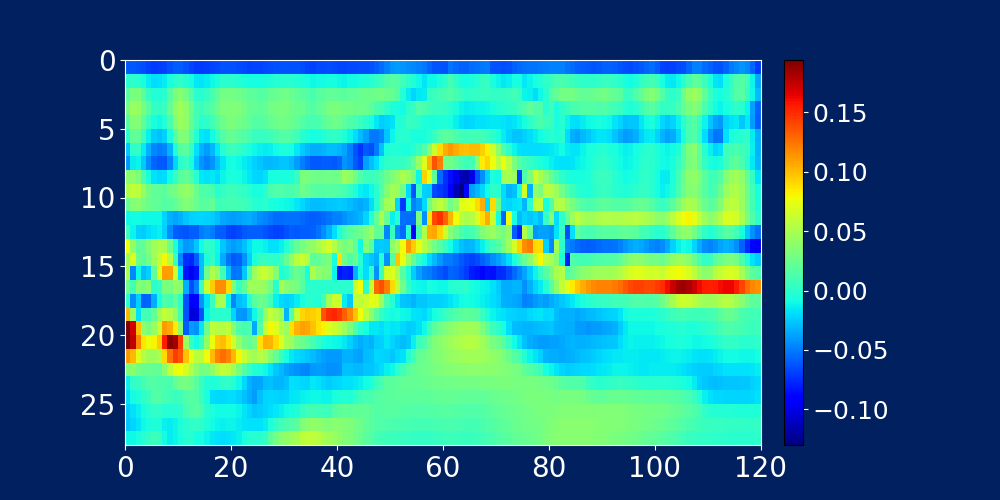

<IPython.core.display.Javascript object>


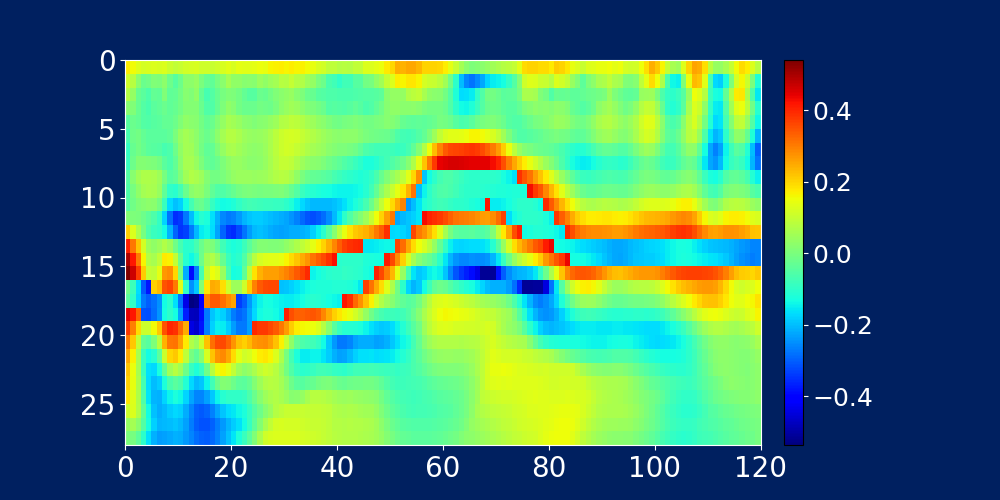

In [29]:
imagesc(FWI_phi-phi_obs)
imagesc(FWI_S_w-S_w_obs)

In [30]:
print(torch.mean((FWI_phi-phi_obs)**2))
print(torch.mean((FWI_S_w-S_w_obs)**2))

tensor(0.0016)
tensor(0.0234)


In [31]:
import scipy.io as sio

In [32]:
# sio.savemat('phimodeltest.mat',{'FWI_phi':FWI_phi.detach().cpu().numpy(),'FWI_S_w':FWI_S_w.detach().cpu().numpy(),\
#                                'FWI_resinew':FWI_resinew.detach().cpu().numpy(),'FWI_resistivity':FWI_resistivity.detach().cpu().numpy(),\
#                                'NN_S_w':NN_S_w.detach().cpu().numpy(),'NN_phi':NN_phi.detach().cpu().numpy(),\
#                                'NN_resinew':NN_resinew.detach().cpu().numpy(),'NN_resistivity':NN_resistivity.detach().cpu().numpy(),\
#                                'phi_obs':phi_obs.detach().cpu().numpy(),'S_w_obs':S_w_obs.detach().cpu().numpy(),\
#                                'resinew':resinew.detach().cpu().numpy(),'resistivity_obs':resistivity_obs.detach().cpu().numpy()})

In [34]:
sio.savemat('phimodeltestert.mat',{'FWI_phi1':FWI_phi.detach().cpu().numpy(),'FWI_S_w1':FWI_S_w.detach().cpu().numpy(),\
                               'FWI_resinew1':FWI_resinew.detach().cpu().numpy(),'FWI_resistivity1':FWI_resistivity.detach().cpu().numpy(),\
                               'NN_S_w1':NN_S_w.detach().cpu().numpy(),'NN_phi1':NN_phi.detach().cpu().numpy(),\
                               'NN_resinew1':NN_resinew.detach().cpu().numpy(),'NN_resistivity1':NN_resistivity.detach().cpu().numpy(),\
                               'phi_obs1':phi_obs.detach().cpu().numpy(),'S_w_obs1':S_w_obs.detach().cpu().numpy(),\
                               'resinew1':resinew.detach().cpu().numpy(),'resistivity_obs1':resistivity_obs.detach().cpu().numpy()})